LAB 2 PICHU & PIKACHU


1. RENSA OCH SORTERA DATAPOINTS

In [100]:
import pandas as pd   # Pandas för att analysera datan

dp = pd.read_csv('Datapoints.txt')   # Läs in tetfilen och skapa tabell 
dp

,(width (cm),height (cm),label (0-pichu,1-pikachu))
0,21.959384,31.239567,0,NaN
1,23.635916,36.468215,1,NaN
2,17.714056,31.441704,0,NaN
3,21.780200,33.213398,1,NaN
4,25.206306,36.558816,1,NaN
...,...,...,...,...
145,18.990690,32.387963,0,NaN
146,23.542000,32.475193,0,NaN
147,19.640603,30.291557,0,NaN
148,21.989954,33.645903,1,NaN


In [101]:
dp.columns = dp.columns.str.strip().str.replace("(","").str.replace(")","").str.capitalize().str.replace(" ", "_")   # Ändra kolumen längst upp
dp["pichu_0/pikachu_1"] = dp["Label_0-pichu"]   # Skapa en ny kolumn och namnge på nytt. Spara pichus och pikachus data i nya kolumnen
dp = dp.drop(["Label_0-pichu", "1-pikachu"], axis=1)   # Ta bort den orginala pichu och pikachu kolumnen med dess data
dp

,Width_cm,Height_cm,pichu_0/pikachu_1
0,21.959384,31.239567,0
1,23.635916,36.468215,1
2,17.714056,31.441704,0
3,21.780200,33.213398,1
4,25.206306,36.558816,1
...,...,...,...
145,18.990690,32.387963,0
146,23.542000,32.475193,0
147,19.640603,30.291557,0
148,21.989954,33.645903,1


In [102]:
# Dela upp datapoints i pichu och pikachu
pichu = dp[dp["pichu_0/pikachu_1"] == 0]
pikachu = dp[dp["pichu_0/pikachu_1"] == 1]
pichu

,Width_cm,Height_cm,pichu_0/pikachu_1
0,21.959384,31.239567,0
2,17.714056,31.441704,0
5,19.332572,32.253256,0
9,20.191281,35.069669,0
14,19.639358,34.561170,0
...,...,...,...
144,18.124818,31.997288,0
145,18.990690,32.387963,0
146,23.542000,32.475193,0
147,19.640603,30.291557,0


2. PLOTTA ALLA PUNKTER FRÅN DATAPOINTS

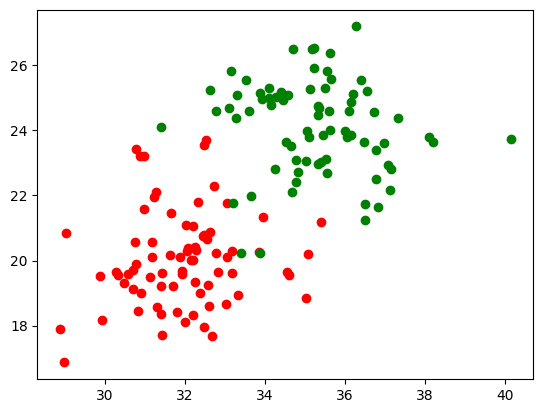

In [103]:
# Importera matplotlib för att få fram sprdningsdiagram
import matplotlib.pyplot as plt
plt.scatter(x=pichu["Height_cm"], y=pichu["Width_cm"], color="red")
plt.scatter(x=pikachu["Height_cm"], y=pikachu["Width_cm"], color="green")



3. RENSA OCH SORTERA TESTPOINTS

In [104]:
# Skapa tom lista för att läsa in textfilen och spara i listan
listt = []
with open("Testpoints.txt", "r") as file:
    content = file.readlines()
    for x in content:
        listt.append(x)
listt



['Test points:\n',
 '1. (25, 32)\n',
 '2. (24.2, 31.5)\n',
 '3. (22, 34)\n',
 '4. (20.5, 34)']

In [105]:
import pandas as pd
tp = pd.DataFrame(listt, columns=["test_points"])   # DataFrame för att kunna spara i tabell, skapa en ny kolumn
# Skapa två nya kolumner och spara info från första kolumnen
tp["bred"]= tp["test_points"].str.split("(").str.get(1).str.split(",").str.get(0)
tp["längd"]= tp["test_points"].str.split(")").str.get(0).str.split(",").str.get(1)
tp = tp.drop("test_points", axis=1)   # Radera första orginal kolumnen  
tp

,bred,längd
0,NaN,NaN
1,25,32
2,24.2,31.5
3,22,34
4,20.5,34


In [106]:
# Radera rad 0 från testpoints
tp = tp.drop(0, axis=0)
tp

,bred,längd
1,25,32
2,24.2,31.5
3,22,34
4,20.5,34


In [107]:
import numpy as np
tp[["bred", "längd"]] = tp[["bred", "längd"]].astype(float)   # Ändra datatypen från str till float
tp

,bred,längd
1,25.0,32.0
2,24.2,31.5
3,22.0,34.0
4,20.5,34.0


4. BERÄKNA AVSTÅND MELLAN DATAPOINTS OCH TESTPOINTS

In [113]:

def pichu(w, h):
   ord = []   # Tom lista där avstånden ska sparas
   for x, y in zip(dp["Width_cm"], dp["Height_cm"]):   # Loopa igenom kolumerna och sätt ihop dem
        ord.append(np.sqrt(np.power(x-w, 2)+np.power(y-h, 2)))  # Beräkna avståndet mellan punkterna och lägg till i listan
   minsta = min(ord)   # Hitta minsta avstånden i listan ord och spara i ny variabel
   indeks = ord.index(minsta)   # Index ska se på vilken rad variabeln "minsta" finns
   if dp.loc[indeks, 'pichu_0/pikachu_1'] == 0: # Loklisera raden och se ifall det är pichu eller pikachu 
       return "Pichu at row", indeks   # indeks för att skriva ut rad nummer
   else:
       return "Pikachu at row", indeks
   

for a, b in zip(tp["bred"], tp["längd"]): # Loopa igenom kolumnerna i tabellen testpoints
    svar =  pichu(a, b)
    print(f"({a}, {b} is classified as {svar}")



(25.0, 32.0 is classified as ('Pikachu at row', 111)
(24.2, 31.5 is classified as ('Pikachu at row', 45)
(22.0, 34.0 is classified as ('Pikachu at row', 148)
(20.5, 34.0 is classified as ('Pichu at row', 53)


In [118]:

while True:
    user_width = input("Ange bredd i positivt nummer: ")   
    user_height = input("Ange längd i ett positivt nummer: ") 
    try:
        user_input = float(user_width.replace(",", "."))   # Ersätt "," med "." så att det blir en float
        user_input2 = float(user_height.replace(",", "."))
        if user_input < 0 or user_input2 < 0:
            print("Fel: Värdet kan inte vara negativt. Försök igen.")
        else:
            print(pichu(user_input, user_input2))
            print(pikachu(user_input, user_input2))
            
            break
    except ValueError:
        print("Fel: Vänligen mata in ett numeriskt värde. Försök igen.")
    


('Pikachu at row', 125)
('Classified as Pikachu, based on majority of 10 nearest points', 7)


10 NÄRMASTE PUNKTER TILL TESTPUNKT

In [125]:


def pikachu(w, h):  
   distances = []   # Tom lista där avstånden ska sparas
   for x, y in zip(dp["Width_cm"], dp["Height_cm"]):   # Loopa igenom kolumerna och sätt ihop dem
        distances.append(np.sqrt(np.power(x-w, 2)+np.power(y-h, 2)))  # Beräkna avståndet mellan punkterna och lägg till i listan med append
   sort_distances = sorted(distances)   # Sortera listan distances från lågt till högt och spara i ny variabel
   sortten = sort_distances[:10]   # Skapa ny variabel där den sorterade datan räknar 10 punkter
   indeks = [distances.index(x) for x in sortten]   # Index ska se på vilken rad variabeln "sortten" finns
   rads = dp.loc[indeks, 'pichu_0/pikachu_1']   # Loklisera raden och se ifall det är pichu eller pikachu 
   if sum(rads) > 5:
       return "Classified as Pikachu, based on majority of 10 nearest points", f"{sum(rads)} of 10"
   else:
       return "Classified as Pichu, based on majority of 10 nearest points", f"{sum(rads)} of 10"
   

for w, h in zip(tp["bred"], tp["längd"]):   # Loopa igenom kolumnerna i tabllen testpoints
    print(pikachu(w, h))


    

('Classified as Pikachu, based on majority of 10 nearest points', '8 of 10')
('Classified as Pichu, based on majority of 10 nearest points', '5 of 10')
('Classified as Pikachu, based on majority of 10 nearest points', '7 of 10')
('Classified as Pichu, based on majority of 10 nearest points', '2 of 10')
